# Data and Setup

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
path = '/Users/mokakash/Documents/MAIN/DATA LEARN/Portfolio_Projects/Python_Projects/NFT_Trades/Assets/NFT_Cleaned_Data.csv'

In [58]:
df = pd.read_csv(path)

In [59]:
df.head(3)

,Date,Method,Alpha Group,Mint/NFT Cost (ETH),Mint/NFT Cost ($),Gas Fee (ETH),Listing Fee Total (ETH),Cost of Trade (ETH),Sell Price (ETH),OS Fee,Royalty Fee,Total Fees (ETH),Profit/Loss (ETH),Wallet,Transfer
0,2022-01-02,Mint,NP,0.069,261.55,0.0099,0.0305,0.1094,0.114,0.025,0.035,0.0473,-0.0023,Main,NO
1,2022-01-02,Mint,NP,0.069,261.55,0.0099,0.0000,0.0789,0.123,0.025,0.035,0.0173,0.0367,Main,NO
2,2022-01-02,Mint,NP,0.020,24.35,0.0030,0.0009,0.0238,0.073,0.025,0.050,0.0093,0.0437,Main,NO


In [60]:
df['Date'] = pd.to_datetime(df['Date'])

# Exploratory Data Analysis (EDA)

**GOAL: Get an understanding of which variables are important, view summary statistics, and visualize the data**

### Overall Trade Performance

**Total Profit vs Total Loss**

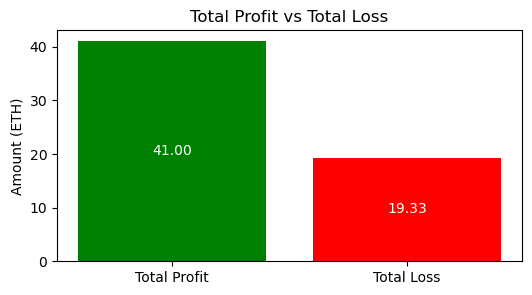

In [61]:
# Calculate total profit and total loss
total_profit = df[df['Profit/Loss (ETH) '] > 0]['Profit/Loss (ETH) '].sum()
total_loss = df[df['Profit/Loss (ETH) '] < 0]['Profit/Loss (ETH) '].sum()

# Creating bar plot for total profit and total loss
plt.figure(figsize=(6, 3))
bars = plt.bar(['Total Profit', 'Total Loss'], [total_profit, abs(total_loss)], color=['green', 'red'])
plt.title('Total Profit vs Total Loss')
plt.ylabel('Amount (ETH)')

# Adding annotations with the exact values in the middle of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', color='white')

plt.show()

**Cumulative Profit/Loss**

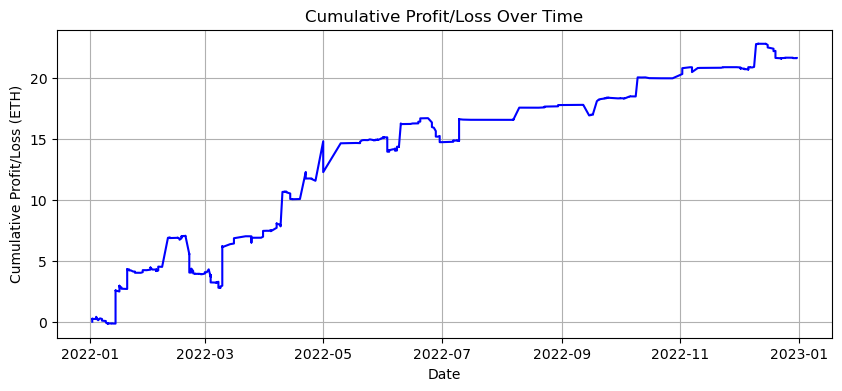

In [62]:
# Sort data by date
df.sort_values('Date', inplace=True)

# Calculate the cumulative sum of Profit/Loss (ETH) over time
df['Cumulative Profit/Loss'] = df['Profit/Loss (ETH) '].cumsum()

# Plotting cumulative sum of Profit/Loss (ETH) over time
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Cumulative Profit/Loss'], color='blue')
plt.title('Cumulative Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit/Loss (ETH)')
plt.grid(True)
plt.show()

### Identify Feature Relationships

**Correlation of Continuous Variables**

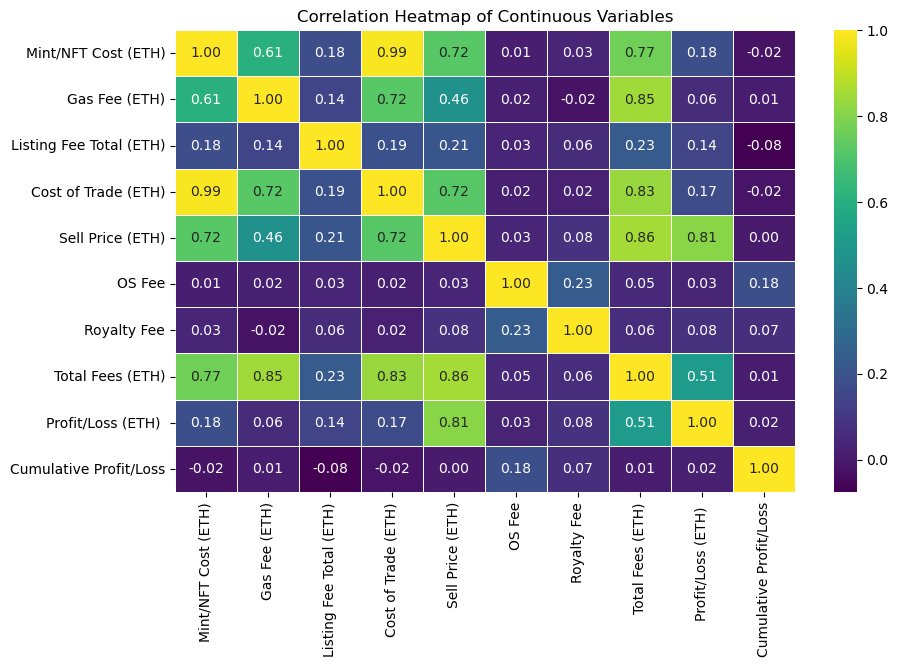

In [63]:
# Calculate the correlation between all continuous numeric variables
numeric_data = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

**Correlation of Numeric Features with Profit/Loss**

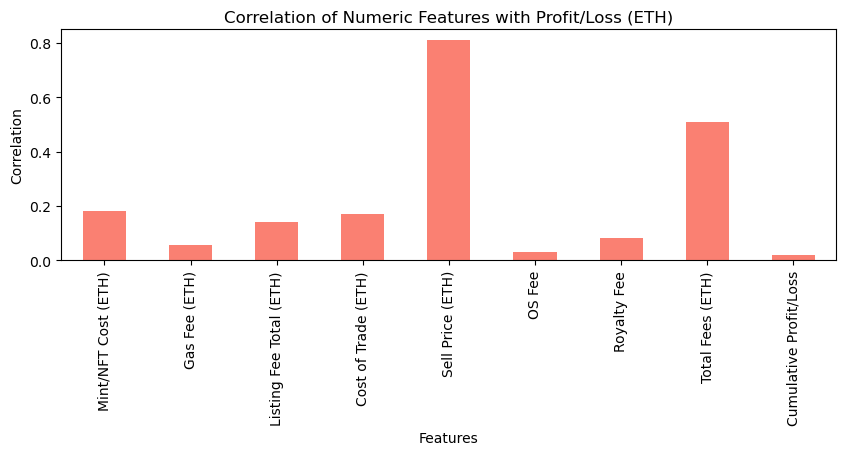

In [64]:
# Calculate the correlation between all continuous numeric variables
numeric_data = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

# Select the correlation of numeric features with 'Profit/Loss (ETH)'
correlation_with_profit_loss = correlation_matrix['Profit/Loss (ETH) '].drop('Profit/Loss (ETH) ')

# Create a bar plot
plt.figure(figsize=(10, 3))
correlation_with_profit_loss.plot(kind='bar', color='salmon')
plt.title('Correlation of Numeric Features with Profit/Loss (ETH)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

### Evaluate Trade Methods Importance/Profitability

**Count of Trades by Method**

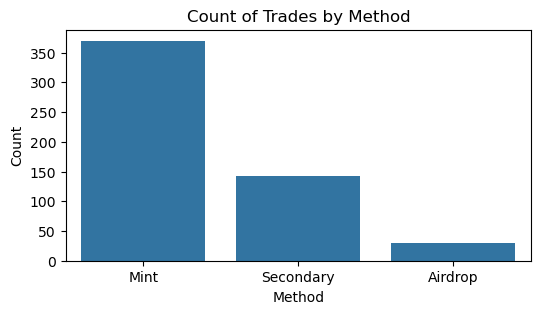

In [65]:
# Plotting a count plot for the 'Method' column
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Method')
plt.title('Count of Trades by Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

**Percentage of Trades by Method**

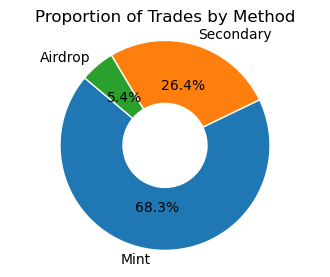

In [66]:
# Calculate counts of trades for each method
method_counts = df['Method'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie(method_counts, labels=method_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.6, edgecolor='w'))
plt.title('Proportion of Trades by Method')
plt.axis('equal')
plt.show()


**Total and Average Profit/Loss by Method**

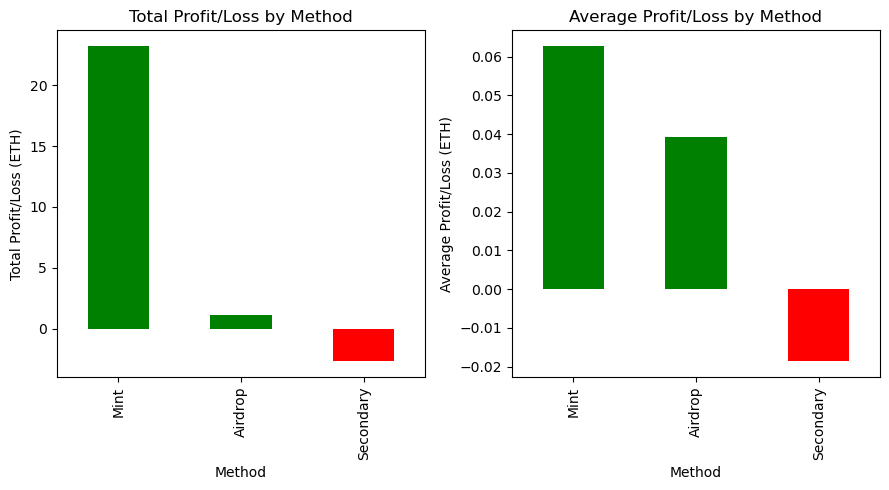

In [67]:
# Calculating total Profit/Loss for each method
total_profit_by_method = df.groupby('Method')['Profit/Loss (ETH) '].sum().sort_values(ascending=False)

# Calculating average Profit/Loss for each method
average_profit_by_method = df.groupby('Method')['Profit/Loss (ETH) '].mean().sort_values(ascending=False)

# Creating subplots for total and average Profit/Loss side-by-side
fig, axs = plt.subplots(1, 2, figsize=(9, 5))

# color coding
colors = ['green' if val > 0 else 'red' for val in total_profit_by_method.values]

# Plotting total Profit/Loss
total_profit_by_method.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_title('Total Profit/Loss by Method')
axs[0].set_xlabel('Method')
axs[0].set_ylabel('Total Profit/Loss (ETH)')

# Plotting average Profit/Loss
average_profit_by_method.plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Average Profit/Loss by Method')
axs[1].set_xlabel('Method')
axs[1].set_ylabel('Average Profit/Loss (ETH)')

plt.tight_layout()
plt.show()

### Understand Alpha Group Distribution and Profitability

**Count of Transactions Derived from Different Alpha Groups**

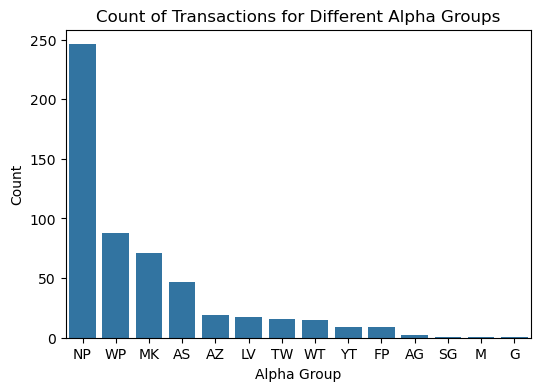

In [68]:
# Plotting a count plot for the 'Alpha Group' column

# Get the counts for each category in the 'Alpha Group' column
alpha_group_counts = df['Alpha Group'].value_counts()

# Extract the categories sorted by their counts in descending order
categories_ordered = alpha_group_counts.index

# Plotting a count plot for the 'Alpha Group' column with ordered categories
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Alpha Group', order=categories_ordered)
plt.title('Count of Transactions for Different Alpha Groups')
plt.xlabel('Alpha Group')
plt.ylabel('Count')
plt.show()

**Total Profit/Loss for Each Alpha Group**

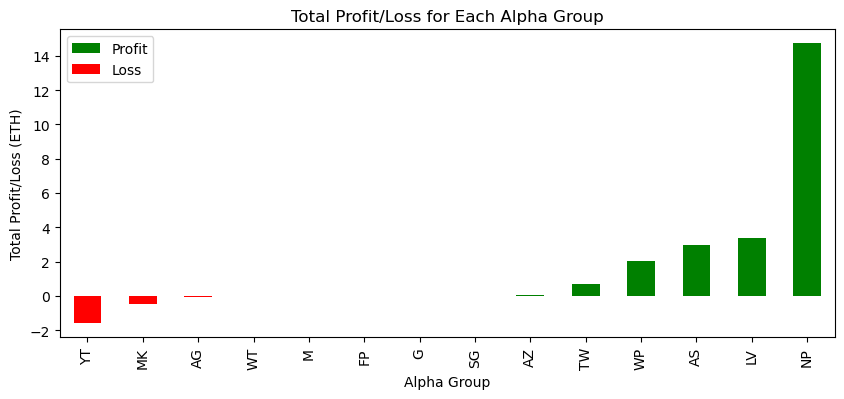

In [69]:
import matplotlib.pyplot as plt

# Calculate the total profit for each Alpha Group
total_profit_by_alpha_group = df.groupby('Alpha Group')['Profit/Loss (ETH) '].sum().sort_values()

# Assign colors based on positive and negative profits
colors = ['green' if val > 0 else 'red' for val in total_profit_by_alpha_group.values]

# Create the bar plot with conditional colors
plt.figure(figsize=(10, 4))
bars = total_profit_by_alpha_group.plot(kind='bar', color=colors)
plt.title('Total Profit/Loss for Each Alpha Group')
plt.xlabel('Alpha Group')
plt.ylabel('Total Profit/Loss (ETH)')

# Adding legend to show color coding
profit = plt.Rectangle((0,0),1,1,fc='g', edgecolor = 'none')
loss = plt.Rectangle((0,0),1,1,fc='r', edgecolor = 'none')
plt.legend([profit, loss], ['Profit', 'Loss'], loc='upper left')

plt.show()


**Average Profit/Loss for Each Alpha Group**

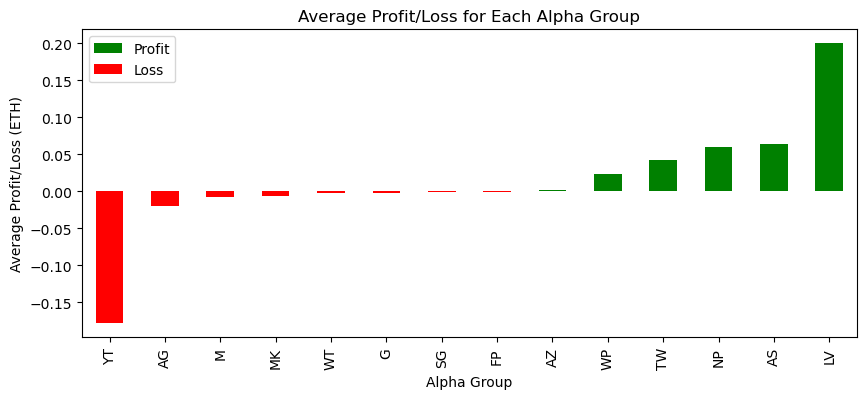

In [70]:
# Calculate the average profit for each Alpha Group
average_profit_by_alpha_group = df.groupby('Alpha Group')['Profit/Loss (ETH) '].mean().sort_values()

# Assign colors based on positive and negative averages
colors = ['green' if val > 0 else 'red' for val in average_profit_by_alpha_group.values]

# Create the bar plot with conditional colors
plt.figure(figsize=(10, 4))
bars = average_profit_by_alpha_group.plot(kind='bar', color=colors)
plt.title('Average Profit/Loss for Each Alpha Group')
plt.xlabel('Alpha Group')
plt.ylabel('Average Profit/Loss (ETH)')

# Adding legend to show color coding
profit = plt.Rectangle((0,0),1,1,fc='g', edgecolor='none')
loss = plt.Rectangle((0,0),1,1,fc='r', edgecolor='none')
plt.legend([profit, loss], ['Profit', 'Loss'], loc='upper left')

plt.show()

### Trend Analysis

**Total Profit/Loss by Month**

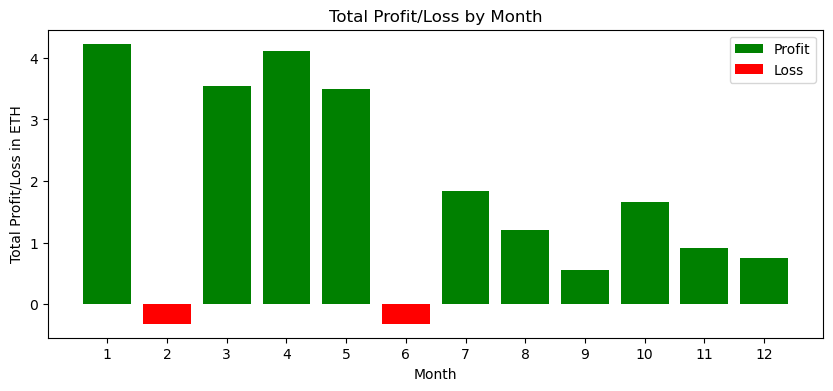

In [71]:
# Extracting 'Month' from 'Date'
df['Month'] = df['Date'].dt.month

# Grouping by 'Month' and calculating the sum of 'Profit/Loss (ETH)' for each month
profit_by_month = df.groupby('Month')['Profit/Loss (ETH) '].sum().reset_index()

# Color coding
colors = ['red' if val < 0 else 'green' for val in profit_by_month['Profit/Loss (ETH) ']]

# Creating a bar plot for total 'Profit/Loss (ETH)' by month
plt.figure(figsize=(10, 4))
bars = plt.bar(profit_by_month['Month'], profit_by_month['Profit/Loss (ETH) '], color=colors)
plt.title('Total Profit/Loss by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit/Loss in ETH')

# Adding legend to show the color coding
profit = plt.Rectangle((0,0),1,1,fc='g', edgecolor = 'none')
loss = plt.Rectangle((0,0),1,1,fc='r', edgecolor = 'none')
plt.legend([profit, loss], ['Profit', 'Loss'])

plt.xticks(profit_by_month['Month'])
plt.show()

***INTERACTIVE GRAPH - Total Profit/Loss by Month**

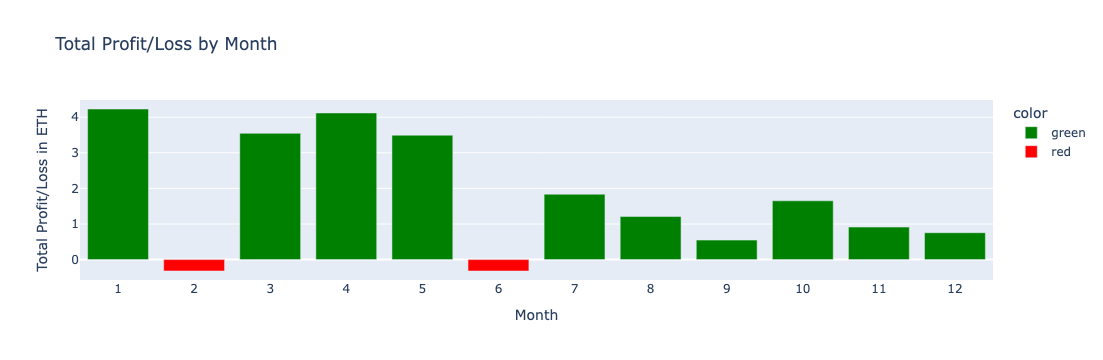

In [72]:
# Visualize total profit/loss by month interactively using Plotly.

import plotly.express as px

# Extracting 'Month' from 'Date'
df['Month'] = df['Date'].dt.month

# Grouping by 'Month' and calculating the sum of 'Profit/Loss (ETH)' for each month
profit_by_month = df.groupby('Month')['Profit/Loss (ETH) '].sum().reset_index()

# Creating a list of colors based on profit/loss values
colors = ['red' if val < 0 else 'green' for val in profit_by_month['Profit/Loss (ETH) ']]

# Creating an interactive bar plot using Plotly
fig = px.bar(profit_by_month, x='Month', y='Profit/Loss (ETH) ', color=colors,
             labels={'Profit/Loss (ETH) ': 'Total Profit/Loss in ETH'},
             title='Total Profit/Loss by Month',
             color_discrete_map={'red': 'red', 'green': 'green'})
fig.update_layout(xaxis=dict(tickmode='linear'), xaxis_title='Month', yaxis_title='Total Profit/Loss in ETH')
fig.show()


**Total Profit/Loss by Quarter**

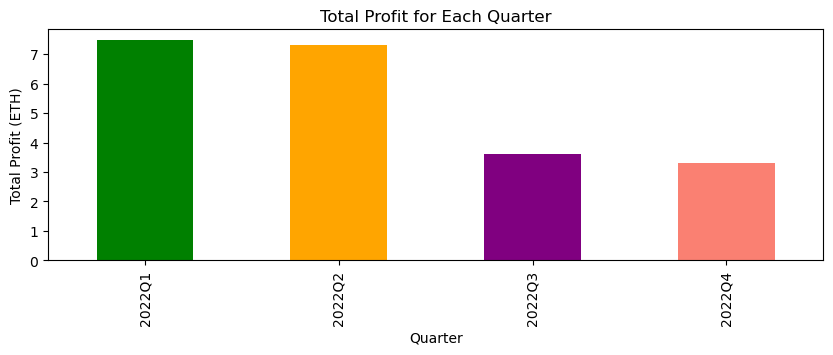

In [73]:
# Create a new 'Quarter' column
df['Quarter'] = df['Date'].dt.to_period('Q')

# Grouping by 'Quarter' and calculating the sum of 'Profit/Loss (ETH)' for each quarter
quarterly_profit = df.groupby('Quarter')['Profit/Loss (ETH) '].sum()

# Define colors for each quarter
colors = ['green', 'orange', 'purple', 'salmon']

# Visualize quarterly profits
plt.figure(figsize=(10, 3))
quarterly_profit.plot(kind='bar', color=colors)
plt.title('Total Profit for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Profit (ETH)')
plt.show()

**Average Profit/Loss by Quarter**

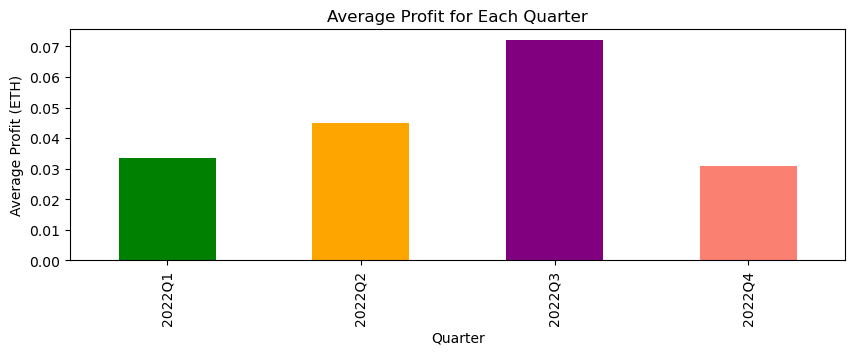

In [74]:
# Calculate average profit for each quarter
quarterly_avg_profit = df.groupby('Quarter')['Profit/Loss (ETH) '].mean()

# Define colors for each quarter
colors = ['green', 'orange', 'purple', 'salmon']

# Visualize quarterly average profits
plt.figure(figsize=(10, 3))
quarterly_avg_profit.plot(kind='bar', color=colors)
plt.title('Average Profit for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Profit (ETH)')
plt.show()